# 📊 03 - Modelagem

## 0. Configuração Inicial

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

Carregando os dados de treino e teste novamente

In [2]:
df_train = pd.read_csv('../data/processed/creditcard_train_balanced.csv')
df_test = pd.read_csv('../data/processed/creditcard_test.csv')

X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']

X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

print(f"Treino carregado: {X_train.shape}")
print(f"Teste carregado: {X_test.shape}")

Treino carregado: (756, 30)
Teste carregado: (56746, 30)


## 1. Isolation Forest

In [3]:
X_train_normal = X_train[y_train == 0]

if_model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
if_model.fit(X_train_normal)

y_pred = if_model.predict(X_test)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

In [4]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.77      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.87      0.54     56746
weighted avg       1.00      0.97      0.99     56746



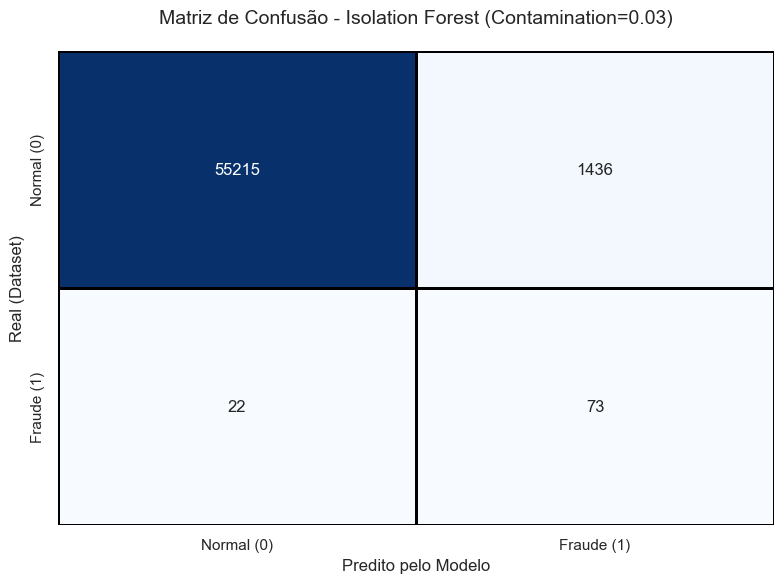

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal (0)', 'Fraude (1)'],
            yticklabels=['Normal (0)', 'Fraude (1)'],
            cbar=False, linewidths=1, linecolor='black')

plt.title('Matriz de Confusão - Isolation Forest (Contamination=0.03)', fontsize=14, pad=20)
plt.xlabel('Predito pelo Modelo', fontsize=12)
plt.ylabel('Real (Dataset)', fontsize=12)

plt.tight_layout()
plt.show()

## 2. Local Outlier Factor (Lof)